# Modelisation de la consommation totale d'energie

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.preprocessing as sk_prepro
from sklearn import metrics

In [2]:
df = pd.read_csv('data_num.csv')

In [119]:
data_num = df
target_tag = 'SiteEnergyUse(kBtu)'
target = data_num[target_tag]
data_num = data_num.drop(labels = [target_tag, 'SiteEnergyUseWN(kBtu)'], axis = 1)

## Modèle linéaire

In [4]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

In [120]:
#first let's test this on knregressoe
xtrain, xtest, ytrain, ytest = train_test_split(data_num, target, test_size = 0.2)

#let's standard scale

sscaler = sk_prepro.StandardScaler()
sscaler_fit = sscaler.fit(xtrain)
xtrain = sscaler_fit.transform(xtrain)
xtest = sscaler_fit.transform(xtest)

#let's grid search for the k

k_grid = {'n_neighbors' : list(range(2,16))}
score = 'r2'

reg = GridSearchCV(KNeighborsRegressor(), k_grid, cv =3, scoring = score, verbose = 1)

reg.fit(xtrain, ytrain)

print('Best params on training set : {}'.format(reg.best_params_))

print('GridCV results : ')
for mean, std, k in zip(reg.cv_results_['mean_test_score'],
                       reg.cv_results_['std_test_score'],
                       reg.cv_results_['params']):
    print('{} = {:.3f} (+/- {:.3f}) for {}'.format(score,mean,std*2,k))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best params on training set : {'n_neighbors': 5}
GridCV results : 
r2 = 0.417 (+/- 0.325) for {'n_neighbors': 2}
r2 = 0.474 (+/- 0.430) for {'n_neighbors': 3}
r2 = 0.483 (+/- 0.440) for {'n_neighbors': 4}
r2 = 0.490 (+/- 0.433) for {'n_neighbors': 5}
r2 = 0.476 (+/- 0.425) for {'n_neighbors': 6}
r2 = 0.466 (+/- 0.428) for {'n_neighbors': 7}
r2 = 0.462 (+/- 0.440) for {'n_neighbors': 8}
r2 = 0.466 (+/- 0.432) for {'n_neighbors': 9}
r2 = 0.458 (+/- 0.430) for {'n_neighbors': 10}
r2 = 0.451 (+/- 0.428) for {'n_neighbors': 11}
r2 = 0.446 (+/- 0.419) for {'n_neighbors': 12}
r2 = 0.439 (+/- 0.411) for {'n_neighbors': 13}
r2 = 0.430 (+/- 0.406) for {'n_neighbors': 14}
r2 = 0.424 (+/- 0.405) for {'n_neighbors': 15}


In [59]:
def true_pred_plot(y,pred):
    fig, ax = plt.subplots()
    r2 = metrics.r2_score(y, pred)
    ax.scatter(y, pred)
    ax.text(0.7,0.7,'R2 : {:.2f}'.format(r2), transform = ax.transAxes)
    ax.set_xlabel('True values')
    ax.set_ylabel('Predicted values')
    ax.set_xlim(-10,y.max())
    ax.set_ylim(-10,y.max())
    plt.show()
    plt.clf()

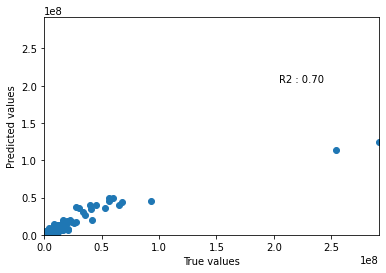

<Figure size 432x288 with 0 Axes>

In [121]:
model = KNeighborsRegressor(n_neighbors=5).fit(xtrain, ytrain)
predict = model.predict(xtest)

true_pred_plot(ytest, predict)

In [8]:
from sklearn import linear_model

24712728.816782948


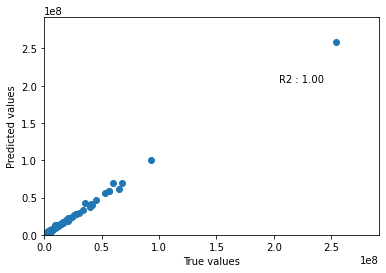

<Figure size 432x288 with 0 Axes>

In [122]:
line_reg = linear_model.LinearRegression()

line_reg.fit(xtrain,ytrain)

baseline_error = np.sqrt(np.abs(np.mean((line_reg.predict(xtest) - ytest ** 2))))
print(baseline_error)

true_pred_plot(ytest, line_reg.predict(xtest))

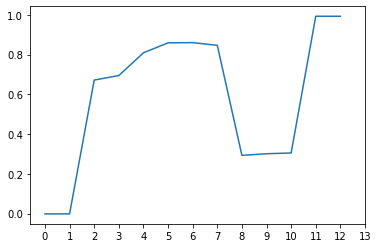

In [123]:
data_num = df
target_tag = 'SiteEnergyUse(kBtu)'
target = data_num[target_tag]
data_num = data_num.drop(labels = [target_tag], axis = 1)

#first let's test this on knregressoe
xtrain, xtest, ytrain, ytest = train_test_split(data_num, target, test_size = 0.2)

#let's standard scale

sscaler = sk_prepro.StandardScaler()
sscaler_fit = sscaler.fit(xtrain)
xtrain = sscaler_fit.transform(xtrain)
xtest = sscaler_fit.transform(xtest)

r2l = []
for i in range(xtrain.shape[1]):
    if i !=0:
        line_fit = line_reg.fit(xtrain[:,0:i+1], ytrain)
        pred = line_fit.predict(xtest[:,0:i+1])
        r2l.append(metrics.r2_score(ytest, pred))

plt.plot(r2l)
plt.xticks(range(14), range(14))
plt.show()

In [96]:
print(data_num.columns)

Index(['ZipCode', 'Latitude', 'Longitude', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')


In [46]:
list(range(14))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

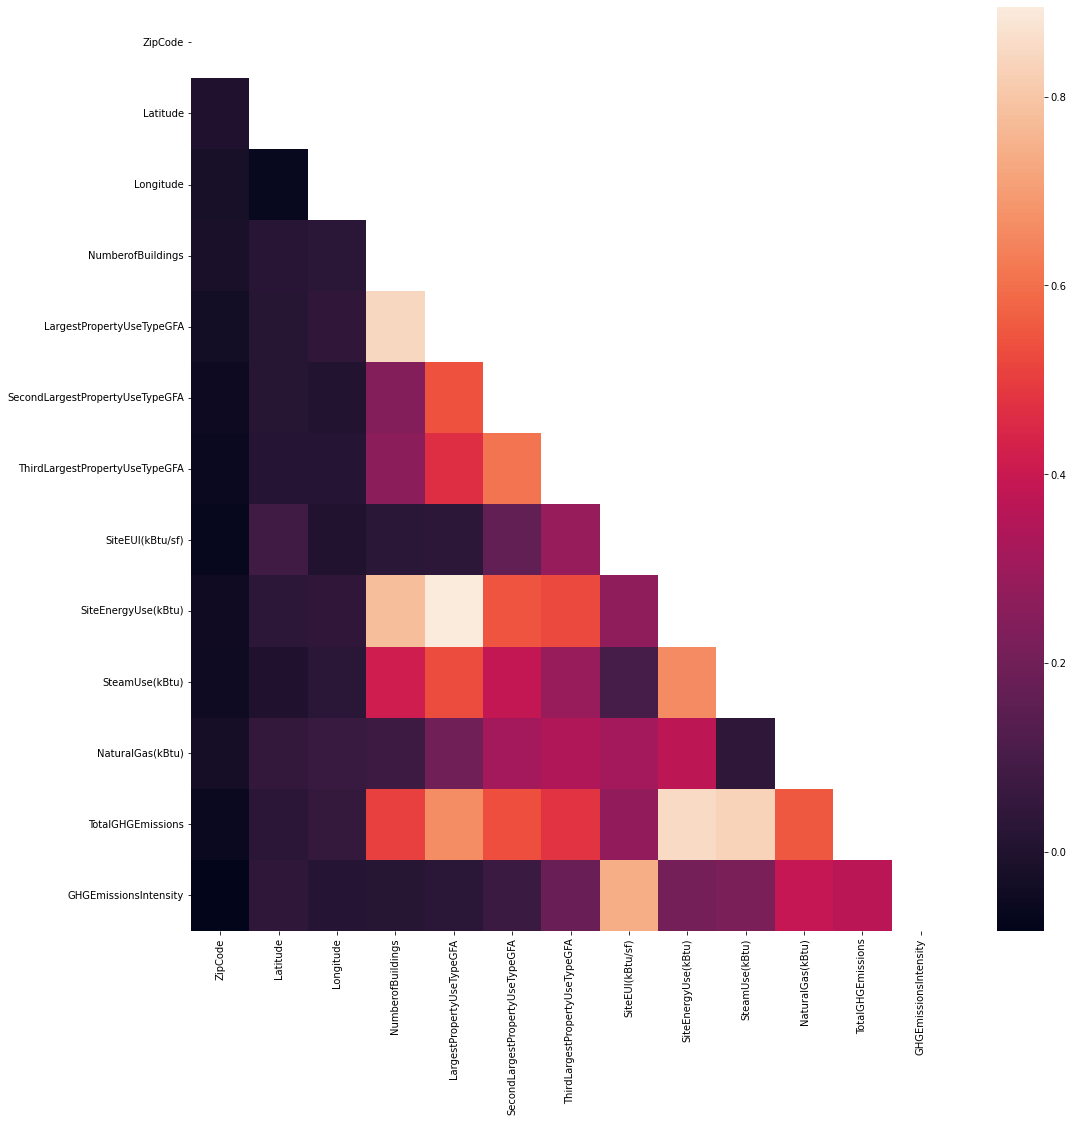

<Figure size 432x288 with 0 Axes>

In [54]:
prout = pd.DataFrame(xtrain, columns = data_num.columns)
corr_mat = prout.corr()

mask = np.triu(np.ones_like(corr_mat, dtype = bool))
fig, ax = plt.subplots(figsize = (17,17))
sns.heatmap(corr_mat, ax=ax, mask=mask)
plt.show()
plt.clf()

In [125]:
#let's try with a svr

c_range = [1.0, 5.0, 10.0, 25.0, 50.0, 100.0]
#gamma_range = np.logspace(-2, 1, 10)
#'gamma' : gamma_range
param_grid = {'C': c_range}

score = 'neg_mean_squared_error'

svr_cv = GridSearchCV(svm.SVR(kernel = 'rbf'), param_grid, cv = 3, scoring = score, verbose = 2)

svr_cv.fit(xtrain, ytrain)

print('Best params on training set : {}'.format(svr_cv.best_params_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ..............................................C=1.0; total time=   0.1s
[CV] END ..............................................C=1.0; total time=   0.1s
[CV] END ..............................................C=1.0; total time=   0.1s
[CV] END ..............................................C=5.0; total time=   0.0s
[CV] END ..............................................C=5.0; total time=   0.0s
[CV] END ..............................................C=5.0; total time=   0.1s
[CV] END .............................................C=10.0; total time=   0.2s
[CV] END .............................................C=10.0; total time=   0.1s
[CV] END .............................................C=10.0; total time=   0.1s
[CV] END .............................................C=25.0; total time=   0.0s
[CV] END .............................................C=25.0; total time=   0.0s
[CV] END ........................................

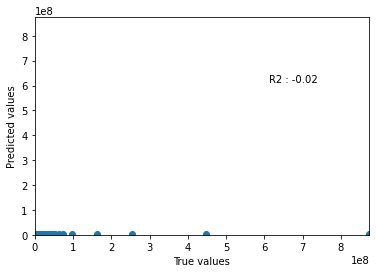

<Figure size 432x288 with 0 Axes>

In [126]:
svr = svm.SVR(kernel="rbf", C=100)
svr = svr.fit(xtrain,ytrain)

true_pred_plot(ytest, svr.predict(xtest))

In [13]:
model = linear_model.Ridge()
model = model.fit(xtrain, ytrain)
true_pred_plot(ytest, model.prediction(xtest))

AttributeError: 'Ridge' object has no attribute 'prediction'